We have been asked to use our hypothesis testing skills to answer the following questions:
- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, we:
- State our Null Hypothesis and Alternative Hypothesis.
- Select the correct test according to the data type and number of samples.
- Test the assumptions of our selected test.
- Execute the selected test, or the alternative test (if we do not meet the assumptions).
- Interpret our p-value and reject or fail to reject our null hypothesis 
- Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('health_insurance.csv')

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Do smokers have higher insurance charges than non-smokers?

Null Hypothesis: There is no significant statistical difference between the insurance charges of smokers and non-smokers.

Alternate Hypothesis: The insurance charges of smokers is higher than those of non-smokers.

In [4]:
# see how many smokers and non-smokers there are
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Since the data is numerical we select a 2 Sample T-test.

In [5]:
# Filtering out smokers and non-smokers
smoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()

In [6]:
smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']

In [7]:
sample = df.sample(n=100,random_state=42)
smoker_charges = sample.loc[ sample['smoker']=='yes',"charges"]
non_smoker_charges = sample.loc[ sample['smoker']=='no',"charges"]
## Getting means for charges with 100 samples
print(f"For Smokers (n={len(smoker_charges)}): Mean={np.mean(smoker_charges):.2f}")
print(f"For Non-Smokers (n={len(non_smoker_charges)}): Mean={np.mean(non_smoker_charges):.2f}")

For Smokers (n=22): Mean=32997.31
For Non-Smokers (n=78): Mean=8394.54


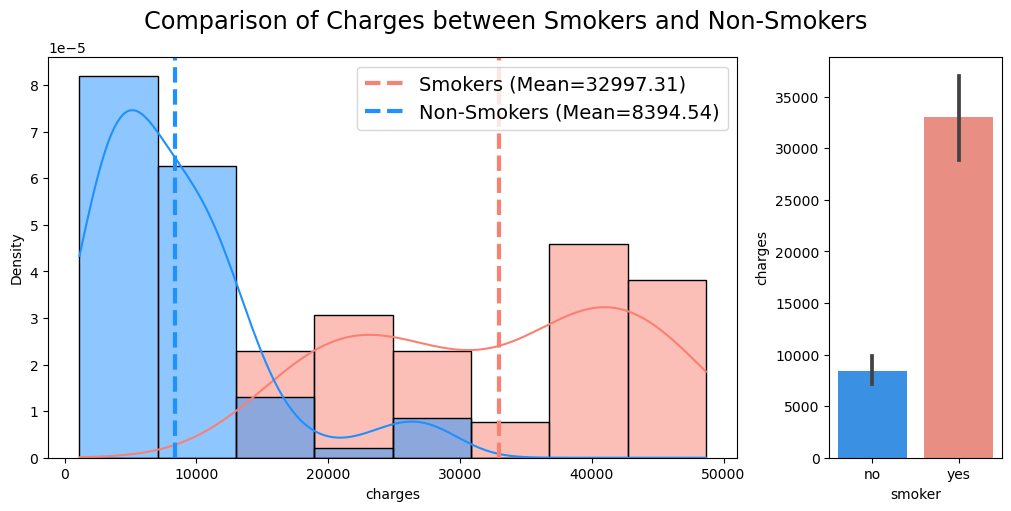

In [8]:
smoker_palette={'yes':'salmon', 'no':'dodgerblue'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-Smokers (Mean={np.mean(non_smoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Comparison of Charges between Smokers and Non-Smokers',fontsize='xx-large');

In [9]:
# Check for outliers in charges for smoker group
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [10]:
# Check for outliers in charges for non-smoker group
zscores= stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

2

In [11]:
# remove outliers from the non-smoker group
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) <= 3)]

In [12]:
# test the smoker group for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=8.481188655372003, pvalue=0.014399031556451041)

In [13]:
# test the non-smoker group for normality
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges

NormaltestResult(statistic=24.595537659778017, pvalue=4.56191151727812e-06)

Our p-values for both groups are well below 0.05, which means our data is NOT normally distributed. However, our sample sizes are large enough to proceed without satisfying this test. Indeed for an independent t test, sample sizes of 15 per group are considered sufficient.

In [14]:
# Test for equal variance
result = stats.levene(smoker_charges,non_smoker_charges)
result

LeveneResult(statistic=28.506495620059756, pvalue=6.24829133463234e-07)

In [15]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=10.983573120201326, pvalue=6.637863392306413e-11)

Our p value is less than alpha (0.05), so we reject the null hypothesis and accept that the insurance charges of smokers is higher than those of non-smokers.

# Are men more likely to smoke than women?

Null Hypothesis: Men and women are equally likely to smoke.

Alternate Hypothesis: Men are more likely to smoke than women.

Since our data is categorical, we use a Chi-Square test.

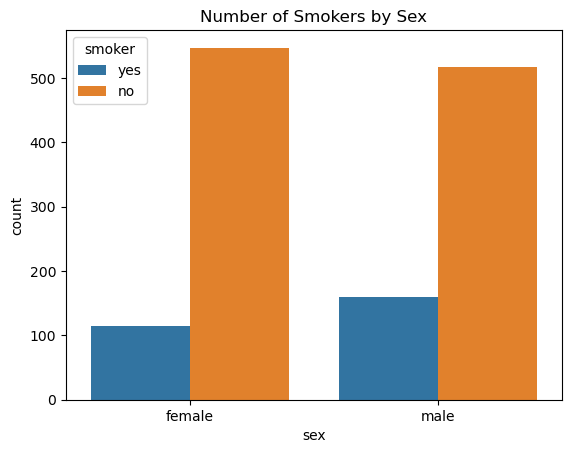

In [16]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [17]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [18]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [19]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

The p-value is less than alpha (0.05), so we have a significant result and reject the null hypothesis.
- This means that we accept the alternate hypothesis and conclude that men are more likely to smoke than women.

# Do different regions have different charges, on average?

Null hypothesis: There is no significant statistical difference between the charges of different regions on average.

Alternate hypothesis: There is a significant statistical difference between the charges of different regions on average.

Since we are comparing numerical data between more than 2 groups, we are going to use an ANOVA test.

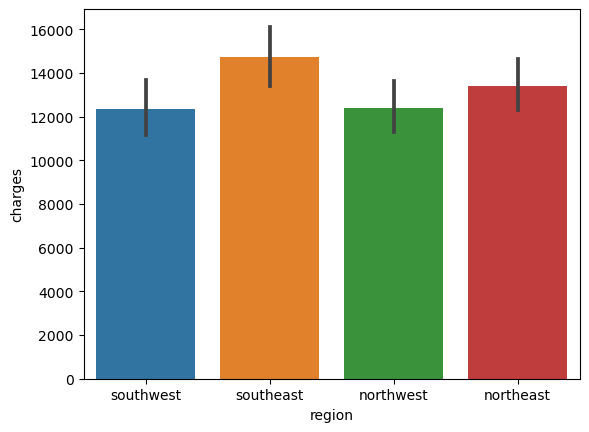

In [20]:
sns.barplot(data=df, x='region',y='charges');

In [22]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for region in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==region,'charges'].copy()
    
    # save into the dictionary
    groups[region] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [23]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for region, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[region] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [24]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


Since our p-values are all (significantly) less than alpha (0.05), we don't have any normal distributions. However, our groups sizes are sufficiently large enough that we can ignore the normality assumption.

In [25]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Since we failed the test assumption of equal variance, we use the nonparametric Kruskal-Wallis test.

In [27]:
result = stats.kruskal('southwest', 'southeast', 'northwest', 'northeast')
result

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


KruskalResult(statistic=3.0, pvalue=0.3916251762710877)

We fail to reject the null hypothesis and find there is no significant statistical difference between the charges of different regions on average.